<a href="https://colab.research.google.com/github/sreekanthTa/DLRegression/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [215]:
# Introduction to Regression with Neural Networks in  TensorFlow

# There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numreical variable based on some other  combination of variables, even shorter... predicting a number.

In [216]:
# Import TensorFlow

import tensorflow as tf

print(tf.__version__)

2.18.0


# Creating data to view and fit

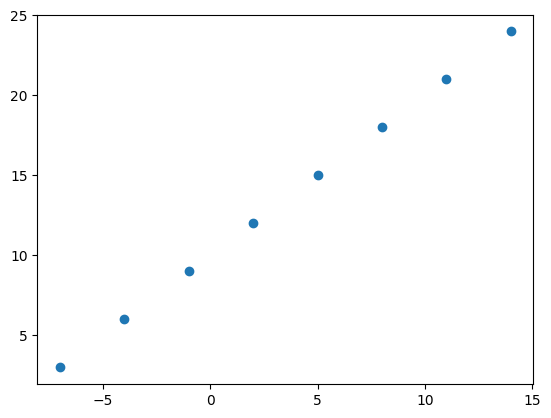

In [217]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0,9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visaulize it
plt.scatter(X, Y)

In [218]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

input and output shapes

In [219]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [220]:
X[0] , Y[0]

(np.float64(-7.0), np.float64(3.0))

In [221]:
X[1], Y[1]

(np.float64(-4.0), np.float64(6.0))

In [222]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [223]:
# Turn our NumPy arrays into tensors

X = tf.constant(X)
Y= tf.constant(Y)
X, Y, X.ndim, Y.ndim

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>,
 1,
 1)

In [224]:
input_shape = X[0].shape
output_shape = Y [0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

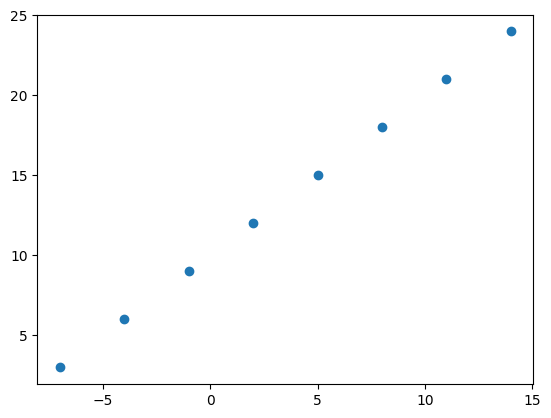

In [225]:
plt.scatter(X, Y)

## Steps in modelling with TensorFlow
1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - defina the loss function (in others words, the function which tells our model how wront it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a mode-  letting the model try to find pattern between X & y (features and labels).

In [226]:
# Set random seed
tf.random.set_seed(43)

# 1. Create a mdoel using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
    )
# 3. Fit the model
model.fit(X,Y, epochs=5)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - loss: 10.9486 - mae: 10.9486
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.8161 - mae: 10.8161
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.6836 - mae: 10.6836
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.5511 - mae: 10.5511
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.4186 - mae: 10.4186


In [227]:
# Try and make a prediction using our model
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[15.417613]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - where we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change thd activation function
function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the  **larning rate** of the optimiztion function.

- here we might fit a model formore **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)


In [228]:
# Set random seed
tf.random.set_seed(43)

# 1. Create a mdoel using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
    )
# 3. Fit the model
model.fit(X,Y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.6091 - mae: 13.6091
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 13.1549 - mae: 13.1549
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 12.7979 - mae: 12.7979
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.4946 - mae: 12.4946
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 12.1858 - mae: 12.1858
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 11.8718 - mae: 11.8718
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.5294 - mae: 11.5294
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 11.1470 - mae: 11.1470
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.7308 - mae: 10.7308
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 10.2736 - mae: 10.2736
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.7834 - mae: 9.7834
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.2321 - mae: 9.2321
Epoch 13/100
1/1 ━━━━━━━━━━━━━━

In [229]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [230]:
# Try and make a prediction using our model
model.predict(np.array([14]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[25.789967]], dtype=float32)

# Common ways to improve a deep model
1. Adding Extra Layers
2. Increase the number of hidden units
3. Change the activation function
4. Change the optimization function
5. Change the learning rate
6. Fitting on more Data
7. Fitting for longer (EP)

## Evaluate a model

In practice, a typical workflow you'' go thoruhg when building neural networks is:
```
Build a model -> fit it -> evaulate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it ....
```

When it comes to evaluation... thre are  3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:

* The data - What data are we working with ? What does it look like ?
* The model itself - what does our model look like ?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do predictions of a model line up against the ground trught (the original labels)?


In [231]:
# Make a bigger dataset
X = tf.range(-100, 100 ,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [232]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

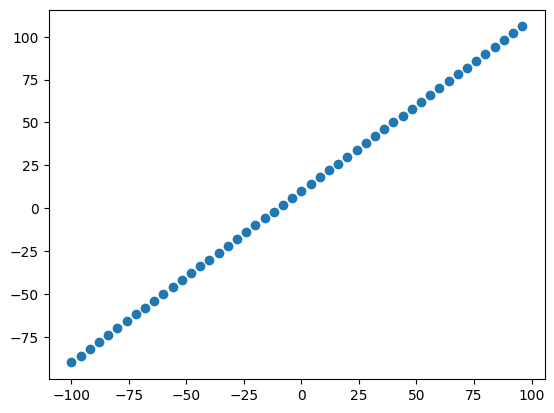

In [233]:
plt.scatter(X,y)

### The 3 sets...

* The data - what data are we working with ? What does it look like?
* The model itself - what does our model look like ?
* The training of a model how does a model perofom while it learns?

. Training set - the model learns from this data, which typically 70-80% of the total data you
. Validation set - the m odel gets tuned on this data, which is typically 10-15% of the data available
.  Test set - the model gets evaluated on this data to test which is has leanred, this set is typical

In [234]:
len(X)

50

In [235]:
# Splite the data into train and test sets
X_train = X[:40] # first 40 are trainint samples (80% of the data)
X_test = X[40:] # last 10 are test samples (20% of the data)

y_train = y[:40] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualising the data

Noww we've got our data in training and test sets... let's visualize it again!

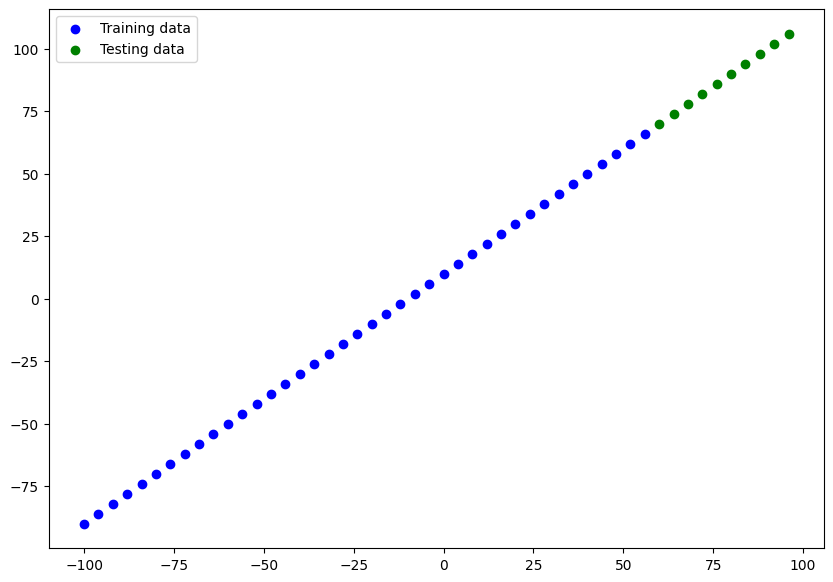

In [236]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
#Show a legend
plt.legend()

# Let's have a look at how to to build a neural network for our data



In [237]:
# 1. Create amodel
model  = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)


Visualize the model

In [238]:
model.summary()

Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_80 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params => Total number of parameters in the model.
* Trainable parameters => these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parametes aren't update duriong training (this is typical when you bring in already learn patterns or parameters from the models during **transfer learning**

**Resource**=> mit deeplearning

In [239]:
# Let's create a model which builds automatically by dfeining the input_shape argumetn:

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1]),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [240]:
model_1.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 41.8373 - mae: 41.8373 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 33.0717 - mae: 33.0717
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 17.8627 - mae: 17.8627
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 28.3627 - mae: 28.3627
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.7957 - mae: 14.7957
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 26.3175 - mae: 26.3175
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 13.9502 - mae: 13.9502
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 26.1242 - mae: 26.1242
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 13.3065 - mae: 13.3065
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 24.9036 - mae: 24.9036
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.0000 - mae: 12.0000
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 24.3707 - mae: 24.3707
Epoch 13/100
2/2 ━━━━━━━

In [241]:
# Get Summary of our model
model_1.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,405 (40.65 KB)

 Trainable params: 10,403 (40.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

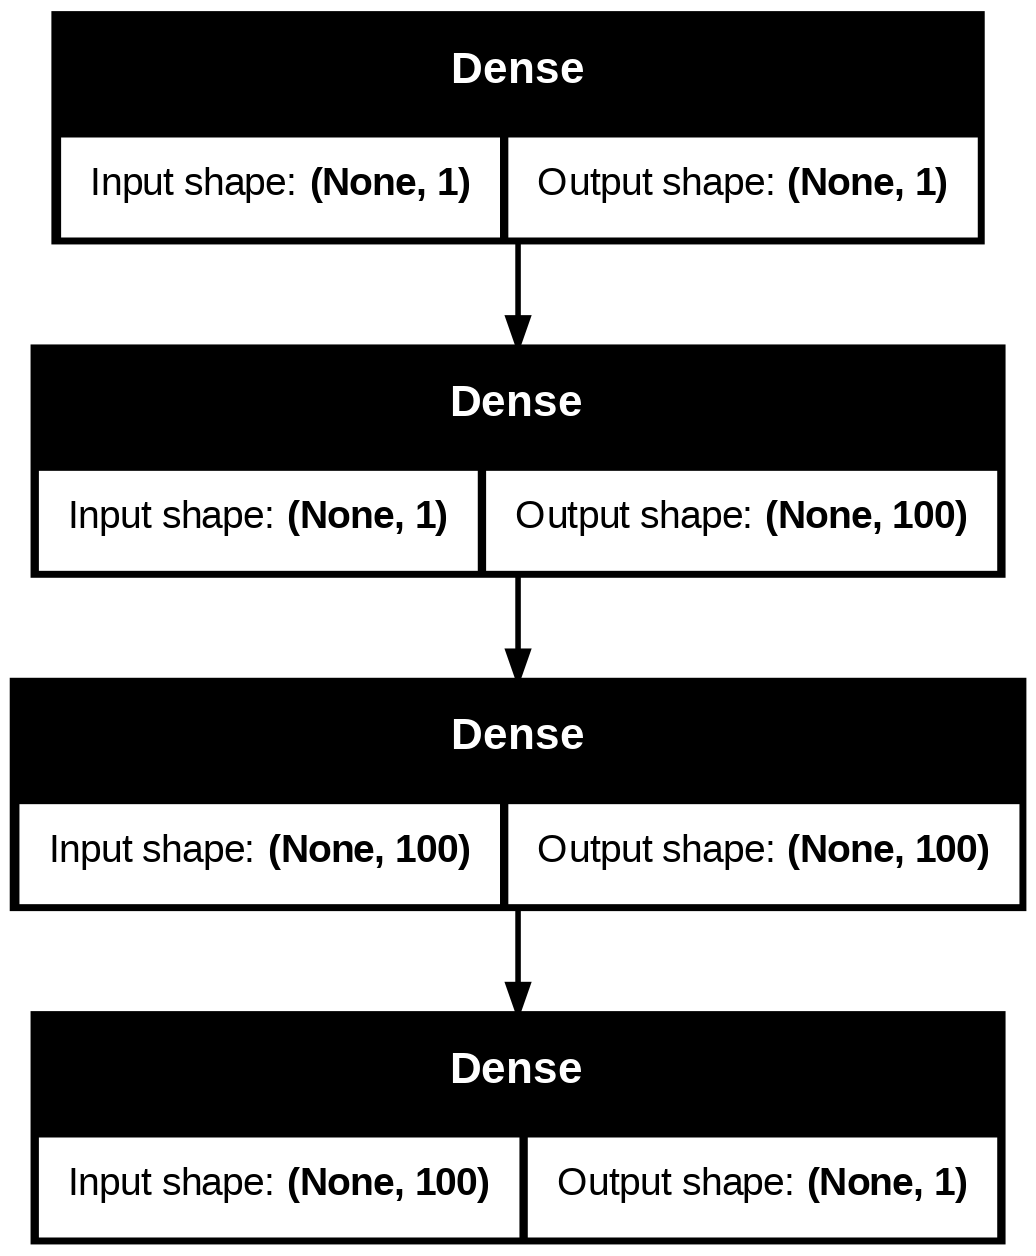

In [242]:
from tensorflow.keras.utils import plot_model

plot_model(model=model_1, show_shapes=True)

# Visualize our model's predictions

In [243]:
# Make some predictions
y_preds = model_1.predict(X_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[ 87.81152 ],
       [ 93.58112 ],
       [ 99.350746],
       [105.12035 ],
       [110.88998 ],
       [116.65958 ],
       [122.429184],
       [128.19879 ],
       [133.96841 ],
       [139.738   ]], dtype=float32)

** Note: ** If you feel like you're going to resuse some kind of functionality in the future, it's good idea to trun it into a function.


In [244]:
def plot_predictions(
    train_data = X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_preds):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot training data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend()




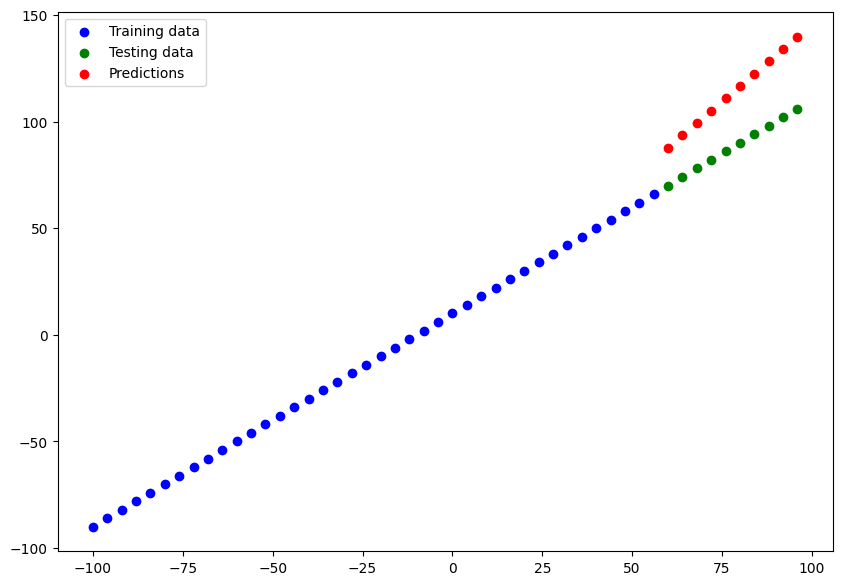

In [245]:
plot_predictions(predictions=y_preds)

### Plotting our model's predicitons with regression evaluation metrics


FOR REGRESSION:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "Square the average errors"

* Huber

MAE -> As a great starter metric for any regression problem.

MSE -> When large errors are more significant than smaller errors.

HBUE -> Combinatio of MSE  and MAE. Less sensitive to outliners than MSE

In [246]:
# Evaluate the model
model_1.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 25.7748 - mae: 25.7748


[25.774768829345703, 25.774768829345703]

In [247]:
# Calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_preds)
mae



25.774768829345703

In [248]:
# Calculate the mean square error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
mse

690.1737670898438

In [249]:
# Make some functions to use MAE and MSE
def mae(y_true, y_pred):
  return mean_absolute_error(y_true, y_pred)
  # return tf.metrics.mean_absolute_error(y_true, y_pred)

def mse(y_true, y_pred):
  return  mean_squared_error(y_true, y_pred)
  # return tf.metrics.mean_squared_error(y_true, y_pred)

### Running experiments to improve our model

```
Build a model -> fit it ->evaluate it -> tweak it -> fit it ->evaluate it -> tweak it -> fit it ->evaluate it -> tweak it -> etc...
```

1. Get model data - get more examples for our model to train on (more oppurtuniites to learn pattersn or relationships between features and labels)
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer
3. Train for longer - give your model mofre of a change to find patterns in the data

Let's do 3 modelling experimetns:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for  100 epochs
3. `model_3` - 2 layers, trained for  500 epochs

BUILD model_1

In [250]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1_ = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model_1_.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
    )

# 3. Fit the model
model_1_.fit(X_train, y_train, epochs=100, verbose=0)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


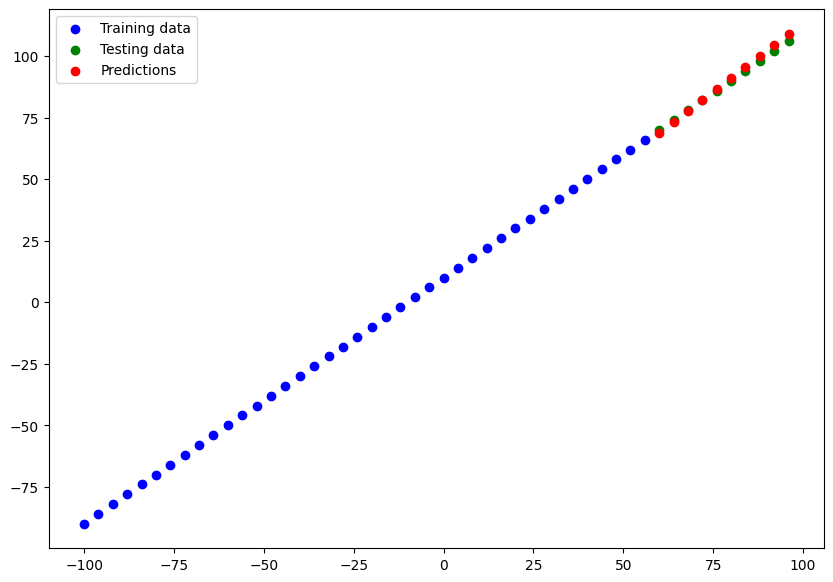

In [251]:
# Make and plot predictions for model_1_
y_preds_1_ = model_1_.predict(X_test)
plot_predictions(predictions=y_preds_1_)

In [252]:
# Calcualte model_1_ evaluation metrics
mae_1 = mae(y_test, y_preds_1_)
mse_1 = mse(y_test, y_preds_1_)
mae_1, mse_1

(1.370794653892517, 2.716296672821045)

BUILD MODEL_2

In [253]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2_ = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2_.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
    )

# 3. Fit the model
model_2_.fit(X_train, y_train, epochs=100, verbose=0)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


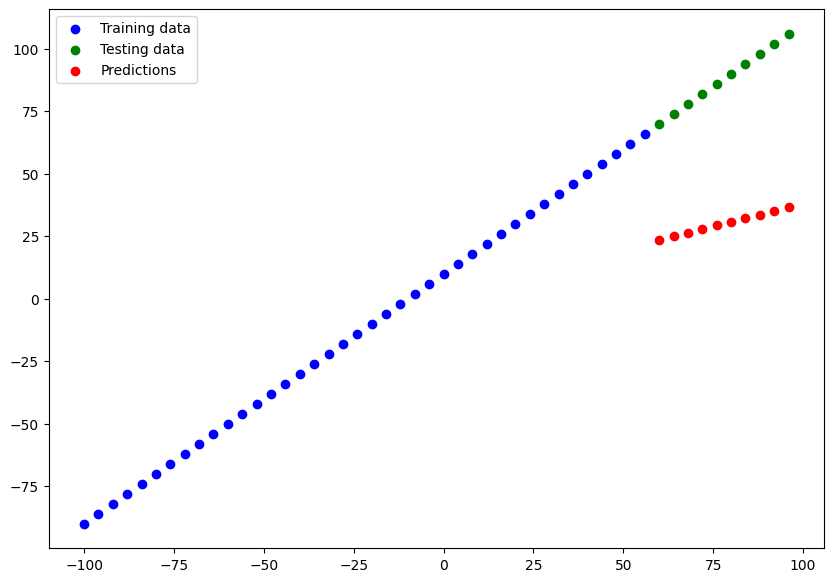

In [254]:
# Make and plot predictions for model_1_
y_preds_2_ = model_2_.predict(X_test)
plot_predictions(predictions=y_preds_2_)

In [255]:
# Calcualte model_2_ evaluation metrics
mae_2 = mae(y_test, y_preds_2_)
mse_2 = mse(y_test, y_preds_2_)
mae_2, mse_2

(57.9483528137207, 3411.811279296875)

BUILD model_3

In [256]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3_ = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3_.compile(
    loss=tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["mae"]
    )

# 3. Fit the model
model_3_.fit(X_train, y_train, epochs=500, verbose=0)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


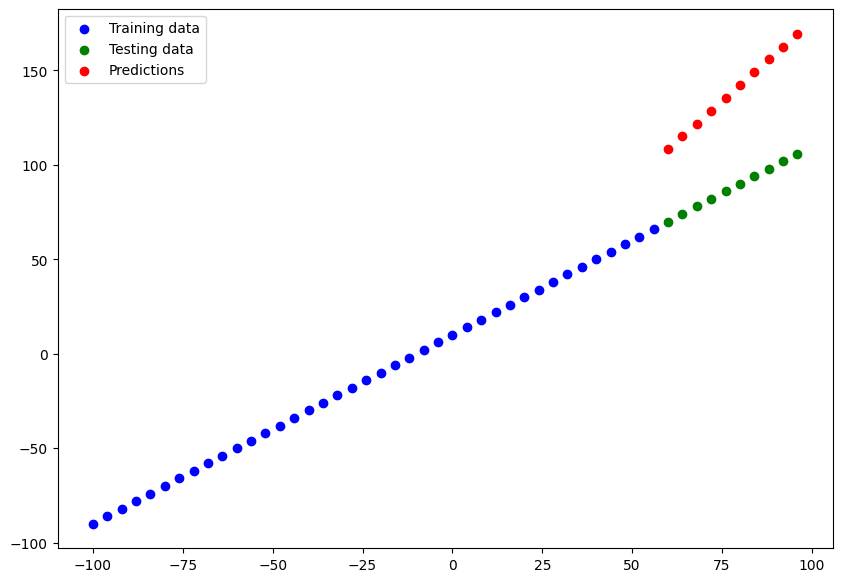

In [257]:
# Make and plot predictions for model_1_
y_preds_3_ = model_3_.predict(X_test)
plot_predictions(predictions=y_preds_3_)

In [258]:
# Calcualte model_3_ evaluation metrics
mae_3 = mae(y_test, y_preds_3_)
mse_3 = mse(y_test, y_preds_3_)
mae_3, mse_3

(50.83134078979492, 2647.9658203125)

## Comparing the results of our experiments.


We've run a few experiments, let's compare the results.

In [259]:
# Let's compare our model's results using a pandas DataFrame

import pandas as pd

model_results = [
    ["model_1", mae_1, mse_1],
    ["model_2", mae_2, mse_2],
    ["model_3", mae_3, mse_3]
]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,1.370795,2.716297
1,model_2,57.948353,3411.811279
2,model_3,50.831341,2647.965820


In [260]:
model_1_.summary()

Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_85 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiemnt, experiment, experiment"

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experimetns

Luckily, there are tools to help us!

**Resource:**  As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiemnts (we'll see this one later).

* Weights & Biases - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allow sus to use them outside of Google colab (or whatever they were trained) such as in web application or mobile app.

There are two main formats we can save our mode's too:

1. The savedModel format
2. The HDF5 format

In [270]:
# Save model using the SavedModel format
model_1_.save("best_modal")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=best_modal.

In [269]:
# Save model using the DF5 format
model_1_.save("best_modal.h5")

### Load our saved model

In [ ]:
# Loading in the SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("best_modal")
loaded_SavedModel_format.summary()